In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import model_selection

In [ ]:
# Loading the data
path = '/content/gdrive/My Drive/project1/' #csv file
df = pd.read_csv(os.path.join(path,'stock.csv'))
df = df.dropna()
print(df.shape)
print(df.info())
df.head(5)

(2216, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2216 non-null   object 
 1   Open    2216 non-null   float64
 2   High    2216 non-null   float64
 3   Low     2216 non-null   object 
 4   Close   2216 non-null   object 
 5   Volume  2216 non-null   object 
dtypes: float64(2), object(4)
memory usage: 121.2+ KB
None


,Date,Open,High,Low,Close,Volume
0,6/29/10,19.000000,25.00,17.540001,23.889999,18766300
1,6/30/10,25.790001,30.42,23.299999,23.83,17187100
2,7/1/10,25.000000,25.92,20.27,21.959999,8218800
3,7/2/10,23.000000,23.10,18.709999,19.200001,5139800
4,7/6/10,20.000000,20.00,15.83,16.110001,6866900


In [ ]:
# string values to floats. 



cols = ['Low', 'Close', 'Volume']
for col in cols:
    for row in range(0,len(df)):
        if type(df[col][row]) != float:
        # #     print(True)
        # print(type(df['Close'][row]))
            if df[col][row][0].isdigit() == True:
                df.replace(df[col][row], float(df[col][row]), inplace=True)
            else:
                df.replace(df[col][row], (float(df[col][row-1]) + float(df[col][row-2])+float(df[col][row-3]))/3.0, inplace=True)

In [ ]:
# Min-max scaling the data
cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())    

df[0:5]

,Date,Open,High,Low,Close,Volume
0,6/29/10,0.007718,0.022441,0.007026,0.021912,0.504958
1,6/30/10,0.026042,0.036972,0.022834,0.021750,0.462465
2,7/1/10,0.023910,0.024908,0.014518,0.016685,0.221146
3,7/2/10,0.018513,0.017347,0.010237,0.009209,0.138297
4,7/6/10,0.010417,0.009035,0.002333,0.000840,0.184769


In [ ]:
# inter-feature correlations

corr_matrix = df.corr()
print(corr_matrix["High"].sort_values(ascending=False))

High      1.000000
Open      0.999578
Low       0.999204
Close     0.994829
Volume    0.467059
Name: High, dtype: float64


In [ ]:
# datetime to pandas interpretable datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2216 non-null   object 
 1   Open    2216 non-null   float64
 2   High    2216 non-null   float64
 3   Low     2216 non-null   float64
 4   Close   2216 non-null   float64
 5   Volume  2216 non-null   float64
dtypes: float64(5), object(1)
memory usage: 185.7+ KB


In [ ]:
# Getting rid of the Date column
df = df.drop(['Date'], axis = 1) 
df.head()

,Open,High,Low,Close,Volume
0,0.007718,0.022441,0.007026,0.021912,0.504958
1,0.026042,0.036972,0.022834,0.021750,0.462465
2,0.023910,0.024908,0.014518,0.016685,0.221146
3,0.018513,0.017347,0.010237,0.009209,0.138297
4,0.010417,0.009035,0.002333,0.000840,0.184769


In [ ]:
# Separating the input and target columns
y_col = ['High'] 
cols.remove('High')

In [ ]:


train_data  = df[0:int(0.8*len(df))]
valid_data  = df[int(0.8*len(df)):]
X_train, y_train, X_valid, y_valid = train_data[cols].values, train_data[y_col].values, valid_data[cols].values, valid_data[y_col].values

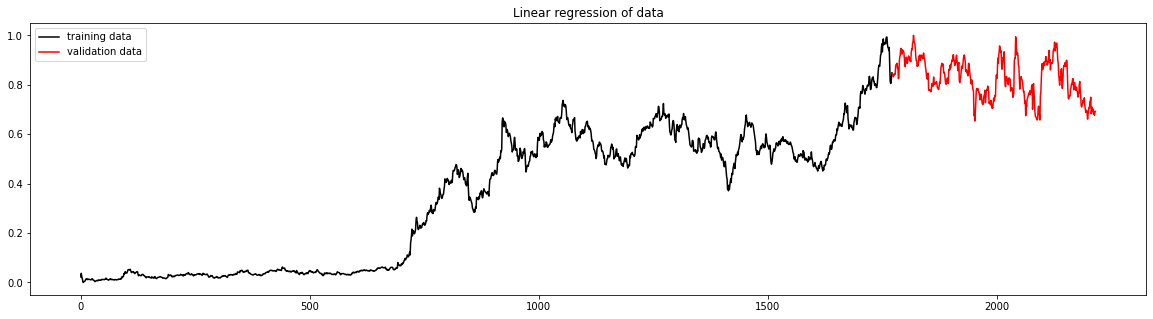

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.array(train_data.index), y_train, label = 'training data', c = 'k')
ax.plot(np.array(valid_data.index), y_valid, label = 'validation data', c = 'r')
ax.legend()
ax.set_title('Linear regression of data')
plt.savefig('train_val.png', dpi = 100)

In [40]:
# Compiling a linear regression model 
reg = LinearRegression().fit(train_data, valid_data)
reg.score(X, y)


ValueError: ignored

In [ ]:
#prediction on the validation data and calculating scores

predicts = lr.predict(X_valid)

print('Validation RMSE = ', np.sqrt(mean_squared_error(y_valid,predicts))) 
print('validation R2 Score = ', r2_score(y_valid, predicts))

Validation RMSE =  0.023800649138078493
validation R2 Score =  0.9069808456871286


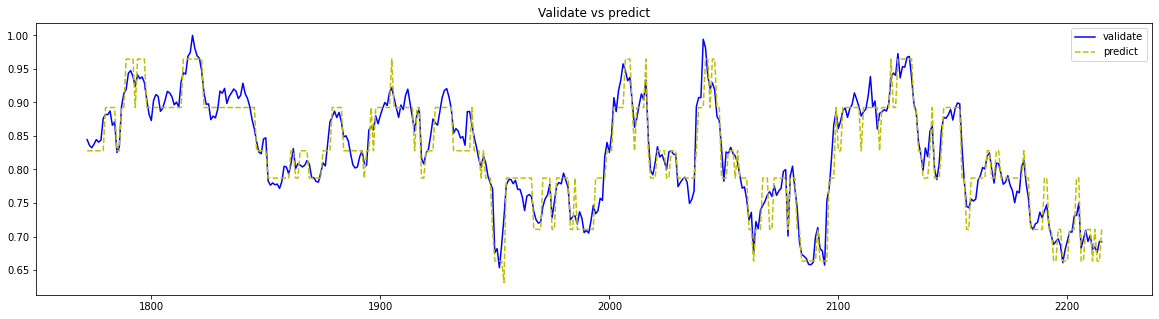

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(np.array(valid_data.index), y_valid, label = 'validate', c = 'b')
ax.plot(np.array(valid_data.index), predicts, label='predict', c = 'y', linestyle = 'dashed')
ax.legend()
ax.set_title('Validate vs predict')
os.chdir(path)
#plt.savefig('predictions.png', dpi = 1000)